In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns
import string

In [2]:
#Cleaning up dups from key field 'Make'
def func(x):
    punc = '''-!()[]{};:'",<>./?@#$%^&*~'''
    for ele in str(x):
        if ele in punc:
            x = str(x).replace(ele, "")
    x = str(x).title()
    x = x.replace(" Inc","")
    x = x.replace(" Corp","")
    x = x.replace(" Co","")
    x = x.replace("Airborne Windsports","Airborne_Windsports")
    x = x.replace("Airborne Windsport","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Ltd","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Air Borne Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Airbus Industrie","Airbus")
    x = x.replace("Airbuss","Airbus")
    x = x.replace("Boeingmpany","Boeing")
    x = x.replace("The Boeingmpany","Boeing")
    x = x.replace("The Boeing","Boeing")
    x = x.replace("Brantley","Brantly")
    x = x.replace("Mcdonnell Douglasoration","Mcdonnell Douglas")
    x = x.replace("Mcdonald Douglas","Mcdonnell Douglas")
    x = x.replace("Mcdonnell-Douglas","Mcdonnell Douglas")
    x = x.replace("Mcdonnell Douglas Aircraft","Mcdonnell Douglas")
    x = x.replace("Douglas","Mcdonnell Douglas")
    x = x.replace("Mcdonnell Douglas Douglas","Mcdonnell Douglas")
    x = x.replace("Saabscania","Saab_Scania")
    x = x.replace("Saab-Scania Ab Saab","Saab_Scania")
    x = x.replace("Saabscania Ab Saab","Saab_Scania")
    x = x.replace("Saab-Scania","Saab_Scania")
    x = x.replace("Waco","Waco_Classic_Aircraft")
    x = x.replace("Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco_Classic_Aircraft Waco_Classic_Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Schweitzer","Schweizer")
    x = x.replace("Schewizer","Schweizer")
    x = x.replace("Pm Aviation Ltd","Pm Aviation")
    x = x.replace("Schleicher Alexander Gmbh ","Schleicher Alexander Gmbh")
       
    return x

In [3]:
df = pd.read_csv('AviationDataCleaned.csv',low_memory=False)
df['Make'] = df['Make'].apply(func)
df['Model'] = df['Model'].apply(func)
df['Make and Model']=df['Make and Model']= df['Make']+"-"+df['Model']
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK').apply(lambda x: str(x).upper())
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [4]:
major_index = df['Make'].value_counts(ascending=False)>100
major_index.index

Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Boeing', 'Mooney', 'Robinson',
       'Grumman', 'Bellanca', 'Hughes',
       ...
       'Aero Bristell', 'Airmaxnstrucoes Aeronautica', 'Newgent Barry',
       'Eurocopter Deutsch', 'Gmk Ventures Llc', 'Dg Flugzeugbau',
       'Delts Wing Kites', 'Holmes William E', 'C A S A', 'Malechek'],
      dtype='object', length=1711)

In [5]:
make_list=list(df['Make'].unique())
make_list.sort()
print(make_list)

['1200', '177Mf Llc', '2000 Mccoy', '2021Fx3 Llc', '3Xtrim', '737', 'A Schleicher Gmbh ', 'Aaa Aircraft Leasing', 'Aaa Aircraft Llc', 'Ab Sportine Aviacija', 'Abc', 'Ac Mfg  Devt', 'Adams', 'Adams Balloon', 'Adams Balloons Llc', 'Adams Dennis Allen', 'Advanced Acft', 'Advanced Aviation', 'Advanced Technology', 'Adventura', 'Aerial Productions Intl', 'Aermacchi', 'Aero Adventure', 'Aero At Sp Zoo', 'Aero Bristell', 'Aero Design Eleven', 'Aero Eli Servizi', 'Aero Falcon Intl', 'Aero Mercantil Sa', 'Aero Sp Z O O', 'Aero Sp Z O O Gobosh', 'Aero Tek', 'Aero Vodochody', 'Aero Vodochody Aero Works', 'Aero Works', 'Aerodyne', 'Aerofab', 'Aerolite', 'Aerommander', 'Aeromot', 'Aeronca', 'Aeronca Aircraftoration', 'Aeronca Champ', 'Aeronca Champion', 'Aeroncabubeck', 'Aeroncabubeck Irving', 'Aeroprakt', 'Aeroprakt Manufacturing Sp Zoo', 'Aeropro Cz', 'Aeropro Cz S R O', 'Aeros', 'Aeros Ltd', 'Aeros Ltdskyranger Aircraft', 'Aerospace', 'Aerospace Tech Of Australia', 'Aerospatiale', 'Aerospatiale 

In [6]:
df.groupby('Make').mean()['Total_passengers'].sort_values(ascending=False).head(60)

Make
Tupolev                                  169.666667
737                                      164.500000
Ltv                                      152.000000
Airbus                                   144.761905
Ilyushin                                 126.000000
Mcdonnelldouglas                         125.333333
Boeing                                   103.110126
Mcdonnell Mcdonnell Mcdonnell Douglas     86.385289
Lockheed                                  73.059322
Bacaerospatiale                           71.000000
Embraerempresa Brasileira De              70.500000
Fokker                                    54.885246
Bac                                       48.000000
British Aircraft Bac                      47.000000
Bombardier                                45.956204
Embraer S A                               40.285714
Mcdonnell Mcdonnell Douglas               37.620818
Atr                                       35.958333
Fairchild Dornier                         35.333333
Nan    

In [7]:
major_index = df['Make'].value_counts(ascending=False)>10
major_makes_dict={'makes':list(major_index.index),'bools':list(major_index.values)}
major_makes = pd.DataFrame(major_makes_dict)


In [8]:
major_makes_list=major_makes.loc[major_makes['bools']==True,'makes']
major_makes_list

0                         Cessna
1                          Piper
2                          Beech
3                           Bell
4                         Boeing
                 ...            
226    Aero Vodochody Aero Works
227                        Extra
228        Piper Aircraftoration
229                       Blanik
230         Cessna Aircraftmpany
Name: makes, Length: 231, dtype: object

In [9]:
df_major=df[df['Make'].isin(major_makes_list)]

In [10]:
df[df['Make'].isin(major_makes_list)].shape

(76209, 27)

In [11]:
df_subset=df[df['Make'].isin(major_makes_list)]
df_subset_make_mean = df_subset.groupby('Make').mean().sort_values(by=['Minor/NonInj_Percentage'],axis=0,ascending=False)
safest_makes=list(df_subset_make_mean.head(15).index)
df_safest = df[df['Make'].isin(safest_makes)]

df_safest_makes=df_safest[df_safest['Weather.Condition'].isin(['IMC','VMC'])]
df_safest_makes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2888 entries, 5 to 79021
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2888 non-null   int64  
 1   Investigation.Type       2888 non-null   object 
 2   Event.Date               2888 non-null   object 
 3   Location                 2885 non-null   object 
 4   Country                  2880 non-null   object 
 5   Injury.Severity          2888 non-null   object 
 6   Aircraft.damage          2100 non-null   object 
 7   Aircraft.Category        862 non-null    object 
 8   Make                     2888 non-null   object 
 9   Model                    2888 non-null   object 
 10  Amateur.Built            2883 non-null   object 
 11  Number.of.Engines        2694 non-null   float64
 12  Engine.Type              2693 non-null   object 
 13  Schedule                 2007 non-null   object 
 14  Total.Fatal.Injuries   

<AxesSubplot:>

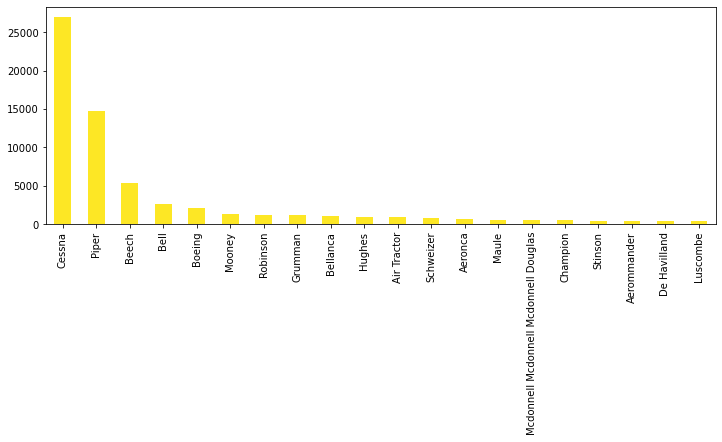

In [12]:
fig, ax = plt.subplots(figsize = (12,4))
df_major['Make'].value_counts().head(20).plot.bar(ax=ax,colormap='viridis_r')

In [13]:
list(safest_makes)

['American Legend Aircraft',
 'Howard Aircraft',
 'Bombardier',
 'Snow',
 'Saab_Scania Ab Saab',
 'Airbus',
 'Boeing',
 'Waco_Classic_Aircraft_Classic_Aircraft',
 'Ultramagic',
 'Grummanschweizer',
 'Fokker',
 'Dassaultbreguet',
 'Mcdonnell Mcdonnell Mcdonnell Douglas',
 'Cub Crafters',
 'Evektoraerotechnik As']

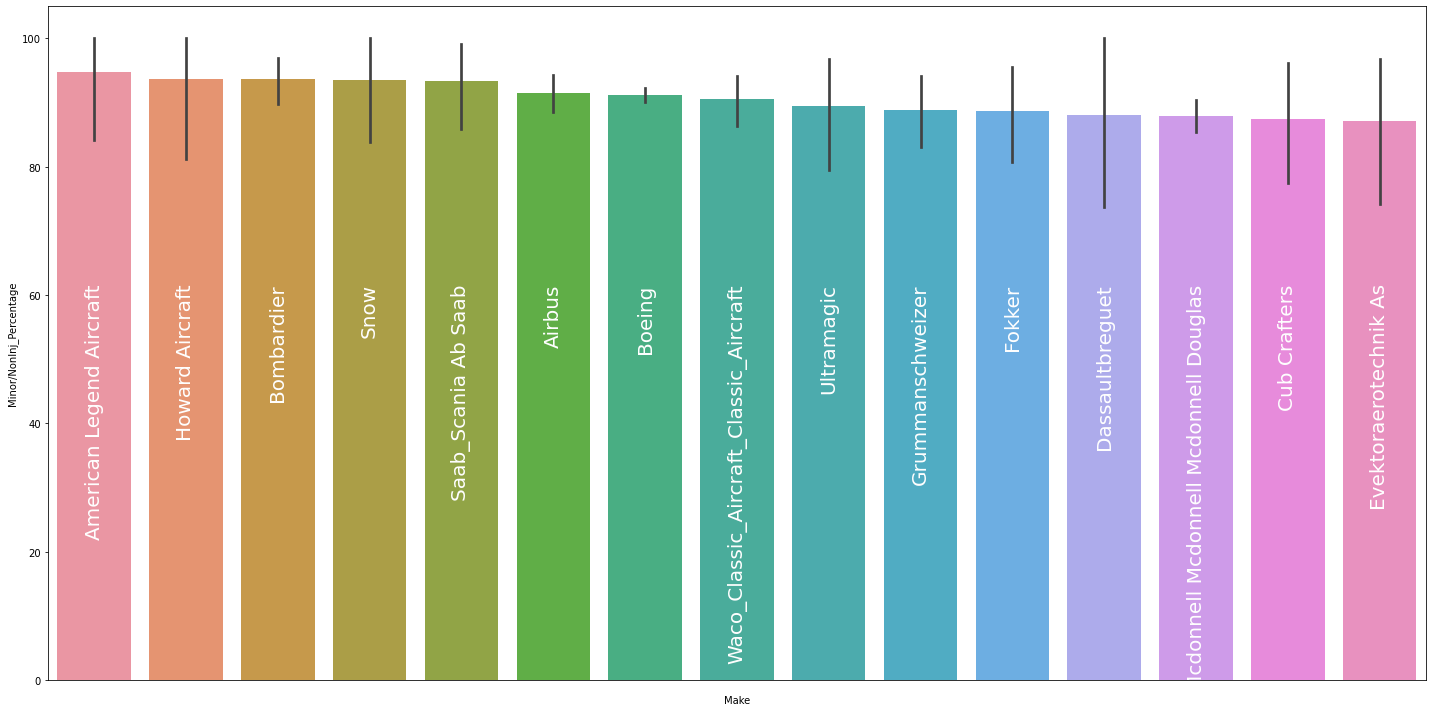

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='Make',y='Minor/NonInj_Percentage',data=df_safest,order=list(safest_makes))
ax.tick_params(axis = 'x', rotation = 90, pad = -400, labelsize=20,colors='white')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Make', ylabel='Minor/NonInj_Percentage'>

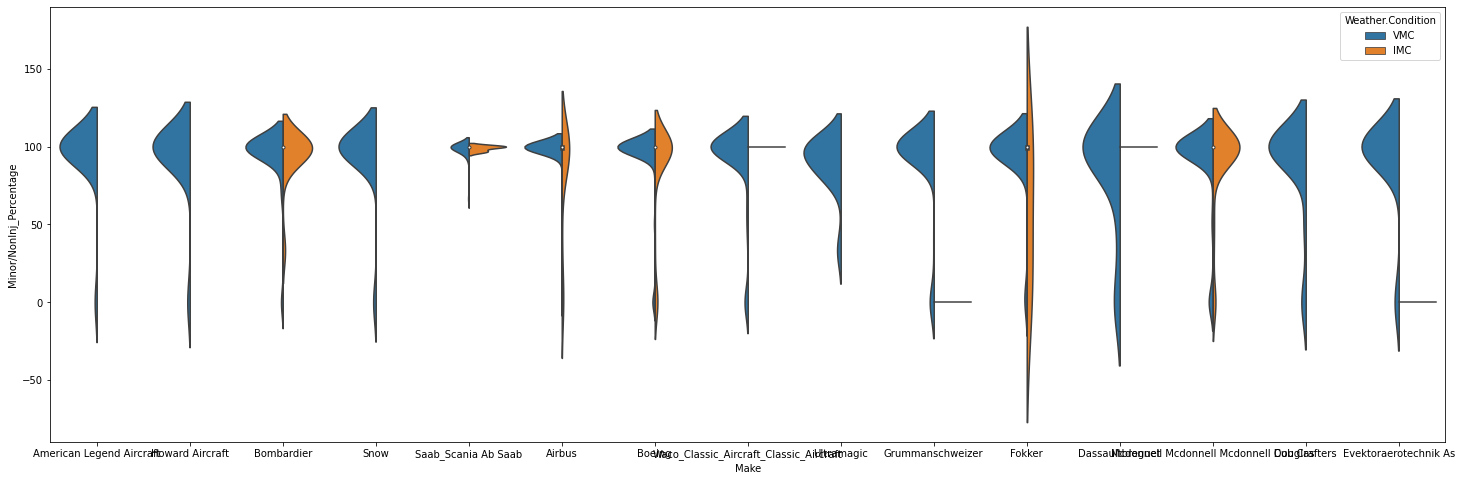

In [15]:
fig, ax = plt.subplots(figsize = (25,8))
sns.violinplot(x='Make',y='Minor/NonInj_Percentage',data = df_safest_makes,order=list(safest_makes),hue='Weather.Condition',split = True)

In [16]:
recommended_makes=['Bombardier','Saab_Scania','Boeing','Mcdonnell Douglas']
len(df[df['Make'].isin(recommended_makes)])

2283

In [17]:
df_subset_makenmodel_mean = df[df['Make'].isin(recommended_makes)].groupby('Make and Model').mean()
df_subset_makenmodel_mean


,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total_passengers,Fatality_Pecentage,Serious_Inj_Percentage,Minor/NonInj_Percentage
Make and Model,,,,,,,,,,,
Boeing-1942,63287.000000,1.0,0.0,0.000000,0.000000,1.000000,2007.0,1.0,0.0,0.000000,100.000000
Boeing-234,42965.000000,NaN,2.0,0.000000,0.000000,0.000000,1997.0,2.0,100.0,0.000000,0.000000
Boeing-369D,47968.000000,1.0,0.0,1.000000,0.000000,0.000000,2000.0,1.0,0.0,100.000000,0.000000
Boeing-369E,46244.500000,1.0,0.0,0.000000,0.000000,1.500000,1998.5,1.5,0.0,0.000000,100.000000
Boeing-707,47692.800000,4.0,34.6,0.400000,0.000000,1.400000,2000.0,36.4,58.4,1.600000,40.000000
...,...,...,...,...,...,...,...,...,...,...,...
Bombardier-Dhc8202,63032.500000,2.0,0.0,0.000000,0.000000,168.000000,2007.0,168.0,0.0,0.000000,100.000000
Bombardier-Dhc8315,72794.000000,2.0,0.0,0.000000,0.000000,7.000000,2012.0,7.0,0.0,0.000000,100.000000
Bombardier-Dhc8401,53101.000000,2.0,0.0,0.500000,0.000000,52.000000,2002.5,52.5,0.0,1.562500,98.437500


In [18]:
df_recommended_makemodels=df_subset_makenmodel_mean[df_subset_makenmodel_mean['Minor/NonInj_Percentage']==100]
recommended_makenmodels=list(df_recommended_makemodels[df_recommended_makemodels['Total_passengers']>10].index)
recommended_makenmodels

['Boeing-707123B',
 'Boeing-707355C',
 'Boeing-717 200',
 'Boeing-717231',
 'Boeing-720025',
 'Boeing-727023',
 'Boeing-727200A',
 'Boeing-727200B',
 'Boeing-72721',
 'Boeing-727214A',
 'Boeing-72722',
 'Boeing-727223B',
 'Boeing-72722C',
 'Boeing-72723',
 'Boeing-727231A',
 'Boeing-727233',
 'Boeing-727247',
 'Boeing-72725',
 'Boeing-727254',
 'Boeing-727257',
 'Boeing-727276',
 'Boeing-727290',
 'Boeing-7272M7',
 'Boeing-7272Q8',
 'Boeing-72731',
 'Boeing-72731H',
 'Boeing-72735',
 'Boeing-72751',
 'Boeing-72790C',
 'Boeing-737  3L9',
 'Boeing-737  4D7',
 'Boeing-737  53C',
 'Boeing-737  6Ct',
 'Boeing-737  800',
 'Boeing-737  8As',
 'Boeing-737  8K2',
 'Boeing-737  932Er',
 'Boeing-737 3H4',
 'Boeing-737 500',
 'Boeing-737 724',
 'Boeing-737 76N',
 'Boeing-737 76Q',
 'Boeing-737 7L9',
 'Boeing-737 800',
 'Boeing-737 832',
 'Boeing-737 924',
 'Boeing-737130',
 'Boeing-737200A',
 'Boeing-737200C',
 'Boeing-737200Rs',
 'Boeing-737205',
 'Boeing-737209',
 'Boeing-737217',
 'Boeing-73724

In [19]:
df_recommended_makes=df[df['Make'].isin(recommended_makes)]
df_recommended_makenmodels=df[df['Make and Model'].isin(recommended_makenmodels)]

In [20]:
df[df['Make']=='Evektor-Aerotechnik As']['Total_passengers'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total_passengers, dtype: float64

In [21]:
df_recommended_makenmodels.to_csv('AviationDataCleaned_RecommendedModel.csv')
df_recommended_makes.to_csv('AviationDataCleaned_RecommendedMakes.csv')